In [2]:
#-----General------#
import numpy as np
import pandas as pd
import os
import sys
import math
import random

#-----Plotting-----#
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as py
py.init_notebook_mode(connected=True)
import seaborn as sns
# from pandas_profiling import ProfileReport

#-----Utility-----#
import itertools
import warnings
warnings.filterwarnings("ignore")
import re
import gc
from bs4 import BeautifulSoup as soup
from urllib.request import Request, urlopen
from datetime import date, datetime


In [3]:
URL = 'https://www.worldometers.info/coronavirus/#countries'
response = Request(URL, headers={'User-Agent': 'Chrome'})
webpage = urlopen(response)
page_soup = soup(webpage, "html.parser")
today = datetime.now()
today_str = "%s %d, %d" % (date.today().strftime("%b"), today.day, today.year)
yesterday_str = "%s %d, %d" % (date.today().strftime("%b"), today.day-1, today.year)
clean = True


<!DOCTYPE html>

<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID - Coronavirus Statistics - Worldometer</title>
<meta content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates." name="description"/>
<!-- Favicon -->
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
<link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
<link href="/favicon/apple-icon-76x76.png" rel="apple-touch-icon
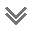

In [4]:

print(page_soup)

In [5]:
table = page_soup.findAll("table", {"id": "main_table_countries_today"})
containers = table[0].findAll("tr", {"style": ""})
del containers[0]
all_data = [] # variable where we will store the data
for country in containers: # iterate over the country names (rows)
    country_data = []
    country_container = country.findAll("td") # find all columns associated with this row
    # Now iterate over the columns

    if country_container[1].text == 'China':
        continue

    for i in range(1, len(country_container)):
        final_feature = country_container[i].text

        # Clean-up column names for easier usage later on (not necessary)
        if clean:
            if i != 1 and i != len(country_container)-1:
                final_feature = final_feature.replace(',', '')
                if final_feature.find('+') != -1:
                    final_feature = final_feature.replace('+', '')
                    final_feature = float(final_feature)
                elif final_feature.find('-') != -1:
                    final_feature = final_feature.replace('-', '')
                    final_feature = float(final_feature)*-1

        # Handle missing data
        if final_feature == 'N/A':
            final_feature = 0
        elif final_feature == '' or final_feature == ' ':
            final_feature = -1 # None
        country_data.append(final_feature)
    all_data.append(country_data)


In [6]:
df = pd.DataFrame(all_data)
df = df.drop([i for i in range(15, len(all_data[0]))], axis=1) # Get rid of unnecessary columns
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,World,697320077,1121.0,6934072,4.0,669091418,4857.0,21294587,38035,89460,889.6,-1,-1,-1,All
1,USA,109180951,-1.0,1181151,-1.0,107093367,-1.0,906433,1385,326103,3528,1186371670,3543468,334805269,North America
2,India,45001268,-1.0,533293,-1.0,0,0.0,0,0,31992,379,930797975,661721,1406631776,Asia
3,Germany,38553102,-1.0,176793,-1.0,38240600,-1.0,135709,0,459602,2108,122332384,1458359,83883596,Europe
4,Brazil,37949944,-1.0,706808,-1.0,36249161,-1.0,993975,0,176222,3282,63776166,296146,215353593,South America


In [7]:
column_labels = ["Country", "Total Cases", "New Cases", "Total Deaths", "New Deaths", "Total Recovered", "New Recovered", "Active Cases", "Serious/Critical",
                "Tot Cases/1M", "Deaths/1M", "Total Tests", "Tests/1M", "Population", "Continent"]
df.columns = column_labels
df.head()

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious/Critical,Tot Cases/1M,Deaths/1M,Total Tests,Tests/1M,Population,Continent
0,World,697320077,1121.0,6934072,4.0,669091418,4857.0,21294587,38035,89460,889.6,-1,-1,-1,All
1,USA,109180951,-1.0,1181151,-1.0,107093367,-1.0,906433,1385,326103,3528,1186371670,3543468,334805269,North America
2,India,45001268,-1.0,533293,-1.0,0,0.0,0,0,31992,379,930797975,661721,1406631776,Asia
3,Germany,38553102,-1.0,176793,-1.0,38240600,-1.0,135709,0,459602,2108,122332384,1458359,83883596,Europe
4,Brazil,37949944,-1.0,706808,-1.0,36249161,-1.0,993975,0,176222,3282,63776166,296146,215353593,South America


In [20]:
for label in df.columns:
    if label != 'Country' and label != 'Continent': # the variables which are non-numeric
        df[label] = pd.to_numeric(df[label])
df = df.drop([207], axis=0) # delete the total row
df

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious/Critical,Tot Cases/1M,Deaths/1M,Total Tests,Tests/1M,Population,Continent,infected_pop
0,World,697320077,1121.0,6934072,4.0,669091418,4857.0,21294587,38035,89460.0,889.6,-1,-1,-1,All,0.004697
1,USA,109180951,-1.0,1181151,-1.0,107093367,-1.0,906433,1385,326103.0,3528.0,1186371670,3543468,334805269,North America,0.002707
2,India,45001268,-1.0,533293,-1.0,0,0.0,0,0,31992.0,379.0,930797975,661721,1406631776,Asia,0.000000
3,Germany,38553102,-1.0,176793,-1.0,38240600,-1.0,135709,0,459602.0,2108.0,122332384,1458359,83883596,Europe,0.001618
4,Brazil,37949944,-1.0,706808,-1.0,36249161,-1.0,993975,0,176222.0,3282.0,63776166,296146,215353593,South America,0.004616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Tuvalu,2943,-1.0,1,-1.0,-1,-1.0,2942,-1,243909.0,83.0,-1,-1,12066,Australia/Oceania,0.243826
203,Saint Helena,2166,-1.0,-1,-1.0,2,-1.0,2164,-1,354211.0,-1.0,-1,-1,6115,Africa,0.353884
204,Montserrat,1403,-1.0,8,-1.0,1376,-1.0,19,-1,282578.0,1611.0,17762,3577442,4965,North America,0.003827
205,Niue,889,-1.0,-1,-1.0,887,-1.0,2,-1,548089.0,-1.0,-1,-1,1622,Australia/Oceania,0.001233


In [21]:
# the average number of active cases
active_avg = df['Active Cases'][1:].mean()
active_avg

35837.228155339806

In [22]:
# portion of infected cases to the population by each country
df['infected_pop'] = df['Active Cases']/df['Population']
# portion of infected cases to the population in the whole.
sum_active = df['Active Cases'][1:].sum()
sum_population = df['Population'][1:].sum()
df['infected_pop'][0] = sum_active/sum_population

df[['Country','infected_pop']]

,Country,infected_pop
0,World,0.001209
1,USA,0.002707
2,India,0.000000
3,Germany,0.001618
4,Brazil,0.004616
...,...,...
202,Tuvalu,0.243826
203,Saint Helena,0.353884
204,Montserrat,0.003827
205,Niue,0.001233


The world row includes some other countries that are excluded in our dataset such as China, etc. So I summed up the rest values from the existing 206 countries in "active cases" column and "population" column, changed the world row to match up the dataset for the above code.

In [26]:
# the portion of the real world population that is active case
portion = df['Active Cases'][0]/8070450601
portion

0.002638587118959803